

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>



<div class="alert alert-info">
<strong>Comentário do estudante</strong>



Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>





<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>



# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

O presente trabalho tem como objetivo analisar o comportamento de clientes da empresa de telecomunicações Megaline, que oferece dois planos pré-pagos: Surf e Ultimate. 

A questão central consiste em identificar qual dos planos gera maior receita. Assim, irei fornecer à Megaline subsídios para decisões estratégicas relacionadas à alocação de recursos de publicidade.
Para isso, utilizarei uma amostra de 500 clientes do banco de dados, com informações sobre chamadas, mensagens e uso de internet ao longo de 2018. 

Meu trabalho será conduzido de forma iterativa, reconhecendo que a análise de dados exige revisões contínuas, seja na preparação ou na interpretação dos resultados. Esse processo de ajustes faz parte natural do trabalho analítico.

As etapas principais incluem: 1)Preparação dos dados (carregamento, inspeção e tratamento de inconsistências); 2)Análise exploratória (descrição estatística do uso dos serviços por plano); 3)Cálculo de receita (mensuração da receita individual e comparação entre os planos); 4)Testes estatísticos (verificação de diferenças significativas no faturamento); e por fim 5)Conclusões (interpretação dos resultados e recomendações para o negócio).

O objetivo final é apresentar uma análise clara e fundamentada, capaz de apoiar a empresa Megaline na definição de qual plano se mostra mais vantajoso do ponto de vista econômico do negócio.

## Inicialização

In [100]:
# Carregando todas as bibliotecas que podemos usar no projeto

import pandas as pd # Manipulação e análise de dados em tabela
import numpy as np # Operações matemáticas/vetoriais e geração de dados
from scipy import stats as st # Estatística inferencial, testes de hipóteses, distribuições
from math import factorial # Funções matemáticas básicas (embora numpy já cubra bastante coisa)
import matplotlib.pyplot as plt # Visualização de gráficos
import seaborn as sns # Visualização estatística dos dados

## Carregue os dados

In [101]:
# Carregando os arquivos dos dados em cinco diferentes DataFrames 

chamadas = pd.read_csv("/datasets/megaline_calls.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
mensagens = pd.read_csv("/datasets/megaline_messages.csv")
planos = pd.read_csv("/datasets/megaline_plans.csv")
usuarios = pd.read_csv("/datasets/megaline_users.csv") 

## Prepare os dados

In [102]:
# Imprimindo informações gerais/resumo sobre o DataFrame dos planos

planos.head() # Primeiras linhas
planos.info() # Tipos de dados e valores nulos
planos.describe() # Estatísticas básicas
planos.shape # Dimensões da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


(2, 8)

In [103]:
# Imprimindo uma amostra de dados dos planos

planos.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


O primeiro DataFrame 'planos' confirma que existem apenas 2 registros de planos, o Surf e o Ultimate e a existência de 8 colunas com informações de tarifas e limites. Os tipos de dados estão corretos, sem valores ausentes. Nosso principal uso é comparar os dois planos entre si, assim um pequeno ajuste possível é converter 'plan_name' para category, otimizando memória e análises comparativas. Isso irá gerar uma economia de memória e eficiência em operações, pelo simples fato de que números inteiros são muito mais rápidos de comparar que strings.

## Corrija os dados

O principal objetivo no projeto é comparar os planos. Embora não existam problemas críticos nos dados carregados em cinco datasets, considero que podemos corrigir a coluna 'plan_name' convertendo de object para category. A referida correção irá ajudar nas análises comparativas e visualizações de gráficos, tornando os dados mais limpos e prontos para os cálculos e comparação entre os planos. 

In [104]:
# Convertendo a coluna 'plan_name' para category
planos['plan_name'] = planos['plan_name'].astype('category')

# Conferindo a mudança
print(planos.info())
print(planos['plan_name'].cat.categories)  # mostra as categorias únicas
print(planos['plan_name'].cat.codes.head())  # mostra os códigos inteiros usados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      int64   
 1   mb_per_month_included  2 non-null      int64   
 2   minutes_included       2 non-null      int64   
 3   usd_monthly_pay        2 non-null      int64   
 4   usd_per_gb             2 non-null      int64   
 5   usd_per_message        2 non-null      float64 
 6   usd_per_minute         2 non-null      float64 
 7   plan_name              2 non-null      category
dtypes: category(1), float64(2), int64(5)
memory usage: 366.0 bytes
None
Index(['surf', 'ultimate'], dtype='object')
0    0
1    1
dtype: int8


## Enriqueça os dados

Para analisar os dois planos e entender melhor o perfil de consumo do usuário Surf e do usuário Ultimate vou incluir duas colunas adicionais. Assim, consigo avaliar de forma mais objetiva qual plano oferece melhor custo/benefício, tanto no uso de minutos quanto no uso de consumo de dados. Vou criar uma coluna "custo_por_minuto_incluido" com as medidas de custo por minutos incluídos em cada plano, e também a coluna "custo_por_gb_incluido" com o custo por GB (gigabyte) incluso no plano. Essas colunas irão enriquecer os dados porque elas traduzem diretamente a eficiência de cada plano. Enquanto o valor mensal mostra apenas o preço fixo, esses novos indicadores irão revelar o quanto cada cliente efetivamente paga por aquilo que está incluso no pacote, permitindo assim uma comparação mais justa entre os diferentes planos. 

In [105]:
# Enriquecendo os dados com mais duas colunas 
# 1. Custo por minuto incluído no plano
planos["custo_por_minuto_incluido"] = (
    planos["usd_monthly_pay"] / planos["minutes_included"]
)

# 2. Custo por GB incluído
planos["custo_por_gb_incluido"] = (
    planos["usd_monthly_pay"] / (planos["mb_per_month_included"] / 1024)  # convertendo MB para GB: divisão por 1024 onde 1 GB é igual a 1024 MB
)

# Visualizando os dados enriquecidos com a inclusão das duas colunas
planos.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,custo_por_minuto_incluido,custo_por_gb_incluido
0,50,15360,500,20,10,0.03,0.03,surf,0.040000,1.333333
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.023333,2.333333


## Usuários

In [106]:
# Imprimindo informações gerais/resumo sobre o DataFrame dos usuários

usuarios.head() # Primeiras linhas
usuarios.info() # Tipos de dados e valores nulos
usuarios.describe() # Estatísticas básicas
usuarios.shape # Dimensões da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


(500, 8)

In [107]:
# Imprimindo uma amostra de dados dos usuários

usuarios.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


O DataFrame dos "usuarios" possui 500 registros e 8 colunas contendo informações cadastrais dos clientes da Megaline. Identifiquei que 6 (seis) colunas estão como strings, porém 2 (duas) dessas 6 (seis) colunas strings: a "reg_date" e a "churn_date", por se tratar de datas, precisam ser convertidas para o tipo datetime, isso irá permitir análises sobre tempo de permanência e cancelamentos com mais clareza. Destaca-se que a única coluna com dados ausentes (NaN) é 'churn_date', o que é esperado, pois a grande maioria dos clientes não cancelou o serviço com a Megaline. 

### Corrija os dados

Com esses ajustes mecionados acima e codificados abaixo, o DataFrame 'usuarios' estará pronto para análises estatísticas e comparativas de clientes, incluindo tempo de permanência no plano, churn (cancelamento/perda de clientes) e comparações de receita entre os planos Surf e Ultimate.

In [108]:
# Convertendo as colunas com datas 'reg_date' e 'churn_date' para datetime
usuarios['reg_date'] = pd.to_datetime(usuarios['reg_date'])
usuarios['churn_date'] = pd.to_datetime(usuarios['churn_date'])

# Convertendo a caluna 'plan' (plano) para category
usuarios['plan'] = usuarios['plan'].astype('category')

# Conferindo alterações
usuarios.info()
usuarios.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


### Enriqueça os dados

Para enriquecer o DataFrame 'usuarios' irei incluir duas novas colunas que irão agregar valor à análise sem sobrecarregar os dados. Uma será a coluna 'tenure_months' que será o cálculo obtido referente o tempo de permanência de cada cliente em meses, permitindo avaliar fidelização por plano. A outra coluna que vou incluir é a 'is_active' que será booleano (0 ou 1) e vai indicar se o cliente está ativo(1) ou cancelado (0), simplificando a análise de churn. Essas adições vão enriquecer os dados e nos retornar uma análise mais informativa e direcionada à comparação entre os planos da Megaline.

In [109]:
# Calculando tempo de permanência do usuário do plano em meses
# 1. Codificando para que se 'churn_date' estiver ausente (NaT) considerar a data final de análise como 2018-12-31
data_final = pd.to_datetime('2018-12-31')
usuarios['tenure_months'] = ((usuarios['churn_date'].fillna(data_final) - usuarios['reg_date'])
                             / np.timedelta64(1, 'M')).round(1)

# 2. Criando indicador de cliente ativo (1 = ativo, 0 = cancelado)
usuarios['is_active'] = usuarios['churn_date'].isna().astype(int)

# Conferindo os novos dados
usuarios.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,tenure_months,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0.2,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,4.6,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2.3,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,11.1,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,7.3,1
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,1.1,1
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,0.7,0
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,5.7,1
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,4.9,1
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,8.3,1


## Chamadas

In [110]:
# Imprimindo informações gerais/resumo sobre o DataFrame das chamadas

chamadas.head() # Primeiras linhas
chamadas.info() # Tipos de dados e valores nulos
chamadas.describe() # Estatísticas básicas
chamadas.shape # Dimensões da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


(137735, 4)

In [111]:
# Imprimindo uma amostra de dados das chamadas

chamadas.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Analisando o DataFrame das 'chamadas' verifica-se que contém 137.735 registros e 4 colunas, representando todas as chamadas feitas pelos clientes da Megaline. O DataFrame inclui informações sobre o identificador da chamada (id), o número do cliente (user_id), a data da chamada (call_date) e a duração em minutos da chamada (duration). As colunas numéricas estão adequadas para cálculos e análises, e não existem valores ausentes. No entanto, a coluna 'call_date' está como string (object) o que limita a análise temporal das chamadas, e a coluna 'id' é uma string que pode ser útil apenas como identificador único.

### Corrija os dados

Preparando os dados de 'chamadas' para análise, estou convertendo abaixo a coluna 'call_date' para o tipo datetime, permitindo calcular métricas temporais, como duração total de chamadas por mês, semana ou dia da semana, dados que poderão ser muito úteis para alcançar a média de consumo do usuário. A coluna 'id' foi mantida como string, já que seu uso principal é identificar registros individuais, e não é necessária para cálculos. Com essas correções, o DataFrame 'chamadas' está pronto para análises estatísticas e comparativas de comportamento.

In [112]:
# Convertendo 'call_date' para datetime
chamadas['call_date'] = pd.to_datetime(chamadas['call_date'])

# Conferindo as alterações
chamadas.info()
chamadas.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


### Enriqueça os dados

Para enriquecer o DataFrame das 'chamadas' vou incluir três novas colunas que agregam valor à análise. Uma será a coluna 'month' que irá permitir analisar o comportamento de chamadas por mês ao longo do ano e identificar padrões sazonais. As outras duas colunas a serem incluídas são 'total_calls_per_user' e 'total_duration_per_user' que irão fornecer medidas agregadas do uso de ligações por cliente. Essas duas colunas vão facilitar comparações entre planos, permitindo calcular o consumo total de minutos em chamadas, o que é essencial para avaliar a receita gerada por cada usuário à empresa Megaline. 

In [113]:
# Extraindo a coluna 'month' (mês) da chamada
chamadas['month'] = chamadas['call_date'].dt.month

# Calculando o total de chamadas por cliente
total_calls = chamadas.groupby('user_id')['duration'].count().reset_index()
total_calls.rename(columns={'duration': 'total_calls_per_user'}, inplace=True)
chamadas = chamadas.merge(total_calls, on='user_id', how='left')

# Calculando o total de duração de chamadas por cliente
total_duration = chamadas.groupby('user_id')['duration'].sum().reset_index()
total_duration.rename(columns={'duration': 'total_duration_per_user'}, inplace=True)
chamadas = chamadas.merge(total_duration, on='user_id', how='left')

# Conferindo os dados enriquecidos com a inclusão das três colunas
chamadas.head(10)

,id,user_id,call_date,duration,month,total_calls_per_user,total_duration_per_user
0,1000_93,1000,2018-12-27,8.52,12,16,116.83
1,1000_145,1000,2018-12-27,13.66,12,16,116.83
2,1000_247,1000,2018-12-27,14.48,12,16,116.83
3,1000_309,1000,2018-12-28,5.76,12,16,116.83
4,1000_380,1000,2018-12-30,4.22,12,16,116.83
5,1000_388,1000,2018-12-31,2.20,12,16,116.83
6,1000_510,1000,2018-12-27,5.75,12,16,116.83
7,1000_521,1000,2018-12-28,14.18,12,16,116.83
8,1000_530,1000,2018-12-28,5.77,12,16,116.83
9,1000_544,1000,2018-12-26,4.40,12,16,116.83


## Mensagens

In [114]:
# Imprimindo informações gerais/resumo sobre o DataFrame das mensagens

mensagens.head() # Primeiras linhas
mensagens.info() # Tipos de dados e valores nulos
mensagens.describe() # Estatísticas básicas
mensagens.shape # Dimensões da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


(76051, 3)

In [115]:
# Imprima uma amostra dos dados das mensagens

mensagens.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


A amostra de dados que temos no DataFrame 'mensagens' contém 76.051 registros e 3 colunas. Esses núemros representam todas as mensagens enviadas pelos clientes da Megaline. As colunas incluem o identificador da mensagem (id), o número do cliente (user_id) e a data de envio da mensagem (message_date). A coluna 'user_id' está corretamente como inteiro, permitindo junções com outros DataFrames, enquanto 'id' e 'message_date' estão como strings (object). Não há valores ausentes, o que é positivo, mas a coluna 'message_date' também precisa ser convertida para datetime para análises temporais e agregações.

### Corrija os dados

Para preparar os dados do DataFrame das 'mensagens' para análise, irei converter a coluna 'message_date' para o tipo datetime, permitindo calcular métricas como número de mensagens enviadas por mês ou dia da semana. A coluna 'id' será mantida como string, já que seu uso principal é identificar registros individuais e não participa de cálculos. Com essa correção, o DataFrame 'mensagens' estará pronto para análises estatísticas e comparativas de comportamento de envio de mensagens por cliente e por plano, de forma consistente com os outros DataFrames do projeto.

In [116]:
# Convertendo a coluna 'message_date' para datetime
mensagens['message_date'] = pd.to_datetime(mensagens['message_date'])

# Conferindo alterações
mensagens.info()
mensagens.head(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


### Enriqueça os dados

Para enriquecer o DataFrame 'mensagens' vou adicionar duas colunas que irão agregar valor à análise sem sobrecarregar a planilha. A coluna 'month' permitirá analisar padrões de envio de mensagens ao longo do ano, enquanto a coluna 'total_messages_per_user' irá fornecer o total de mensagens enviadas por cada cliente. Esses fatores tornarão a análise mais rica e informativa, direcionando à comparação entre os dois planos da empresa Megaline, permitindo assim avaliar o comportamento dos clientes de forma clara e objetiva, sem poluir o dataset com colunas desnecessárias.

In [117]:
# Extraindo o mês da mensagem
mensagens['month'] = mensagens['message_date'].dt.month

# Calculando total de mensagens por usuário
total_messages = mensagens.groupby('user_id')['id'].count().reset_index()
total_messages.rename(columns={'id': 'total_messages_per_user'}, inplace=True)
mensagens = mensagens.merge(total_messages, on='user_id', how='left')

# Conferindo o DataFrame enriquecido
mensagens.head(10)

,id,user_id,message_date,month,total_messages_per_user
0,1000_125,1000,2018-12-27,12,11
1,1000_160,1000,2018-12-31,12,11
2,1000_223,1000,2018-12-31,12,11
3,1000_251,1000,2018-12-27,12,11
4,1000_255,1000,2018-12-26,12,11
5,1000_346,1000,2018-12-29,12,11
6,1000_386,1000,2018-12-30,12,11
7,1000_413,1000,2018-12-31,12,11
8,1000_502,1000,2018-12-27,12,11
9,1000_525,1000,2018-12-28,12,11


## Internet

In [118]:
#  Imprimindo uma amostra de dados para o tráfego da internet

internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Verifica-se que o DataFrame 'internet' contém 104.825 registros e 4 colunas, representando todas as sessões de consumo de internet pelos clientes da Megaline. As colunas incluem o identificador da sessão (id), o número do cliente (user_id), a data da sessão (session_date) e a quantidade de dados consumidos em megabytes (mb_used). A coluna 'user_id' está corretamente como inteiro, enquanto 'mb_used' está como número flutuante (float), permitindo cálculos de consumo total e média de dados. As colunas 'id' e 'session_date' estão como strings (object). Não há valores ausentes, o que é ótimo. De todo modo, o que precisa ser feito aqui é converter a coluna 'session_date' para datetime a fim de permitir análises temporais de consumo por mês, semana ou dia da semana. 

### Corrija os dados

Dessa forma, para preparar os dados para uma melhor análise, irei converter a coluna 'session_date' para o tipo datetime, facilitando cálculos de consumo total de dados por usuário, por período e cruzamentos com planos. A coluna 'id' será mantida como string, suficiente para identificar cada registro individual. Com essa correção, o DataFrame 'internet' estará pronto para análises estatísticas e comparativas de consumo de internet, permitindo avaliar padrões de uso e consumo por cliente e plano, de forma consistente com os demais DataFrames do projeto.

In [119]:
# Convertendo a coluna 'session_date' para datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Conferindo as alterações
internet.info()
internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


### Enriqueça os dados

Para finalizar a preparação dos dados, irei enriquecer os dados no DataFrame 'internet' adicionando duas colunas que irão agregar valor à análise. Irei extrair da coluna 'session_date', adicionando a coluna 'month' (mês da sessão), o que permitirá analisar padrões de consumo de internet ao longo do ano.  Já a inserção da coluna 'total_mb_per_user' fornecerá o total de megabytes consumidos por cada cliente da Megaline. Esses fatores tornarão a análise mais informativa e direcionada à comparação entre planos, permitindo avaliar o comportamento de uso de internet de forma clara e objetiva.

In [120]:
# Extraindo o mês da sessão
internet['month'] = internet['session_date'].dt.month

# Calculando total de MB consumidos por usuário
total_mb = internet.groupby('user_id')['mb_used'].sum().reset_index()
total_mb.rename(columns={'mb_used': 'total_mb_per_user'}, inplace=True)
internet = internet.merge(total_mb, on='user_id', how='left')

# Conferindo o DataFrame enriquecido
internet.head(10)

,id,user_id,session_date,mb_used,month,total_mb_per_user
0,1000_13,1000,2018-12-29,89.86,12,1901.47
1,1000_204,1000,2018-12-31,0.00,12,1901.47
2,1000_379,1000,2018-12-28,660.40,12,1901.47
3,1000_413,1000,2018-12-26,270.99,12,1901.47
4,1000_442,1000,2018-12-27,880.22,12,1901.47
5,1001_0,1001,2018-08-24,284.68,8,80437.94
6,1001_3,1001,2018-12-09,656.04,12,80437.94
7,1001_4,1001,2018-11-04,16.97,11,80437.94
8,1001_10,1001,2018-11-27,135.18,11,80437.94
9,1001_15,1001,2018-12-13,761.92,12,80437.94


## Estude as condições dos planos

Antes de realizar qualquer análise comparativa de receita ou comportamento de clientes da Megaline, é fundamental compreender as condições de cada plano oferecido. Isso inclui valores de assinatura, franquias de minutos, mensagens, dados de internet e tarifas adicionais em caso de consumo excedente. Revisitar essas informações garante que todos os cálculos de consumo, faturamento e comparações entre planos estejam corretos e consistentes com a realidade do serviço.

In [121]:
# Imprimindo as condições dos planos e certificando de que elas fazem sentido 
# Exibindo informações gerais sobre os planos
planos.info()

# Exibindo estatísticas descritivas para colunas numéricas
planos.describe()

# Conferindo os tipos de dados e possíveis ajustes
planos.dtypes

# Exibinda a tabela 
planos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   messages_included          2 non-null      int64   
 1   mb_per_month_included      2 non-null      int64   
 2   minutes_included           2 non-null      int64   
 3   usd_monthly_pay            2 non-null      int64   
 4   usd_per_gb                 2 non-null      int64   
 5   usd_per_message            2 non-null      float64 
 6   usd_per_minute             2 non-null      float64 
 7   plan_name                  2 non-null      category
 8   custo_por_minuto_incluido  2 non-null      float64 
 9   custo_por_gb_incluido      2 non-null      float64 
dtypes: category(1), float64(4), int64(5)
memory usage: 398.0 bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,custo_por_minuto_incluido,custo_por_gb_incluido
0,50,15360,500,20,10,0.03,0.03,surf,0.040000,1.333333
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.023333,2.333333


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


## Agregue os dados por usuário

Verificado que os dados estão limpos e para facilitar a análise comparativa entre 'planos' e 'usuarios' irei agregar os dados por usuário e por período, ou seja, por mês. Ao consolidar todas as chamadas, mensagens e consumo de internet em um único registro mensal por cliente, conseguirei simplificar cálculos de métricas agregadas, identificar padrões de uso, calcular consumo excedente e comparar a receita gerada por cada plano de forma mais clara e organizada. Essa agregação torna o conjunto de dados mais manejável e consistente para as próximas etapas analíticas do projeto.

In [122]:
# Calculando o número de chamadas feitas por cada usuário por mês. Salvando o resultado.

chamadas_por_usuario = chamadas.groupby(['user_id', 'month'])['id'].count().reset_index()
chamadas_por_usuario.rename(columns={'id': 'total_calls_per_month'}, inplace=True)
chamadas_por_usuario.head(10)

,user_id,month,total_calls_per_month
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


In [123]:
# Calculando a quantidade de minutos gastos por cada usuário por mês. Salvando o resultado.

minutos_por_usuario = chamadas.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutos_por_usuario.rename(columns={'duration': 'total_minutes_per_month'}, inplace=True)
minutos_por_usuario.head(10)

,user_id,month,total_minutes_per_month
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
5,1001,12,392.93
6,1002,10,54.13
7,1002,11,359.76
8,1002,12,363.24
9,1003,12,1041.00


In [124]:
# Calculando o número de mensagens enviadas por cada usuário por mês. Salvando o resultado.

mensagens_por_usuario = mensagens.groupby(['user_id', 'month'])['id'].count().reset_index()
mensagens_por_usuario.rename(columns={'id': 'total_messages_per_month'}, inplace=True)
mensagens_por_usuario.head(10)

,user_id,month,total_messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [125]:
# Calculando o volume de tráfego de internet usado por cada usuário por mês. Salvando o resultado.

internet_por_usuario = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_por_usuario.rename(columns={'mb_used': 'total_mb_per_month'}, inplace=True)
internet_por_usuario.head(10)


,user_id,month,total_mb_per_month
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


Cada agregação transforma múltiplos registros diários juntando dados. Em cada um registro por usuário por mês, temos informações sobre uso das mensagens, de minutos em ligações e sessão de internet. Essa etapa de agregação realizando a fusão de informações é crucial para unir os dados e simplificar a análise. Fazer esse agrupamento de dados vai facilitar cálculos de consumo excedente e permitir comparações diretas no consumo dos usuários dos planos Surf e Ultimate. Assim, podemos colocar os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês.

In [126]:
# Juntando os dados de chamadas, minutos, mensagens e internet com base em user_id e month

usuarios_por_mes = (
    chamadas_por_usuario
    .merge(minutos_por_usuario, on=["user_id", "month"], how="outer")
    .merge(mensagens_por_usuario, on=["user_id", "month"], how="outer")
    .merge(internet_por_usuario, on=["user_id", "month"], how="outer")
)

usuarios_por_mes.head(10)

,user_id,month,total_calls_per_month,total_minutes_per_month,total_messages_per_month,total_mb_per_month
0,1000,12,16.0,116.83,11.0,1901.47
1,1001,8,27.0,171.14,30.0,6919.15
2,1001,9,49.0,297.69,44.0,13314.82
3,1001,10,65.0,374.11,53.0,22330.49
4,1001,11,64.0,404.59,36.0,18504.30
5,1001,12,56.0,392.93,44.0,19369.18
6,1002,10,11.0,54.13,15.0,6552.01
7,1002,11,55.0,359.76,32.0,19345.08
8,1002,12,47.0,363.24,41.0,14396.24
9,1003,12,149.0,1041.00,50.0,27044.14


In [127]:
# Adicionando a coluna com as informações sobre o tipo de plano

usuarios_por_mes = usuarios_por_mes.merge(usuarios[["user_id", "plan"]], on="user_id", how="left")

usuarios_por_mes.head(10)

,user_id,month,total_calls_per_month,total_minutes_per_month,total_messages_per_month,total_mb_per_month,plan
0,1000,12,16.0,116.83,11.0,1901.47,ultimate
1,1001,8,27.0,171.14,30.0,6919.15,surf
2,1001,9,49.0,297.69,44.0,13314.82,surf
3,1001,10,65.0,374.11,53.0,22330.49,surf
4,1001,11,64.0,404.59,36.0,18504.30,surf
5,1001,12,56.0,392.93,44.0,19369.18,surf
6,1002,10,11.0,54.13,15.0,6552.01,surf
7,1002,11,55.0,359.76,32.0,19345.08,surf
8,1002,12,47.0,363.24,41.0,14396.24,surf
9,1003,12,149.0,1041.00,50.0,27044.14,surf


Através dos 'usuarios_por_mes' e o DataFrame dos 'usuarios' que contém 'user_id' e 'plan', é possível calcular a receita mensal de cada usuário considerando as regras dos planos. Como temos os dados do DataFrame 'planos', vou criar um dicionário para acessar rapidamente os limites e tarifas por plano. Para calcular a receita mensal de cada usuário, vou considerar tanto a mensalidade do plano quanto os excedentes de consumo. A receita mensal de cada usuário será calculada somando a mensalidade do plano aos valores cobrados pelos consumos que excederam os limites de minutos, mensagens e dados. Esse método permite refletir com precisão o impacto financeiro do consumo individual em cada plano.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

As agregações aconteceram adequadamente, bem como a junção entre dfs, que utilizou o operador 'outer', conforme o esperado!
</div>

In [128]:
# Calculando a receita mensal para cada usuário

# Passo 1: Definir limites e tarifas de cada plano
# Transformando o DataFrame planos em dicionário para fácil acesso
plan_dict = planos.set_index('plan_name').to_dict('index')

plan_dict

# Passo 2: Função para calcular receita por usuário/mês
def calcular_receita(row):
    plano = plan_dict[row['plan']]
    
    # Chamadas excedentes
    excess_minutes = max(0, row['total_minutes_per_month'] - plano['minutes_included'])
    receita_chamadas = excess_minutes * plano['usd_per_minute']
    
    # Mensagens excedentes
    excess_messages = max(0, row['total_messages_per_month'] - plano['messages_included'])
    receita_mensagens = excess_messages * plano['usd_per_message']
    
    # Dados excedentes (MB -> GB)
    excess_gb = max(0, (row['total_mb_per_month'] - plano['mb_per_month_included']) / 1024)
    receita_dados = excess_gb * plano['usd_per_gb']
    
    # Receita total = mensalidade + excedentes
    receita_total = plano['usd_monthly_pay'] + receita_chamadas + receita_mensagens + receita_dados
    
    return receita_total

# Passo3: Aplicar a função ao DataFrame
usuarios_por_mes['receita_mensal'] = usuarios_por_mes.apply(calcular_receita, axis=1)

# Conferindo resultado
usuarios_por_mes.head(10)


,user_id,month,total_calls_per_month,total_minutes_per_month,total_messages_per_month,total_mb_per_month,plan,receita_mensal
0,1000,12,16.0,116.83,11.0,1901.47,ultimate,70.000000
1,1001,8,27.0,171.14,30.0,6919.15,surf,20.000000
2,1001,9,49.0,297.69,44.0,13314.82,surf,20.000000
3,1001,10,65.0,374.11,53.0,22330.49,surf,88.161191
4,1001,11,64.0,404.59,36.0,18504.30,surf,50.706055
5,1001,12,56.0,392.93,44.0,19369.18,surf,59.152148
6,1002,10,11.0,54.13,15.0,6552.01,surf,20.000000
7,1002,11,55.0,359.76,32.0,19345.08,surf,58.916797
8,1002,12,47.0,363.24,41.0,14396.24,surf,20.000000
9,1003,12,149.0,1041.00,50.0,27044.14,surf,150.332930


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Receita foi calculada adequadamente!
</div>

## Estude o comportamento do usuário

Para estudar o comportamento do usuário da Megaline vou calcular algumas estatisticas úteis para os dados agregados, revelando uma imagem geral capturada pelos dados, para isso vou desenhar gráficos para ajudar a compreensão. Como o trabalho principal desse projeto é comparar os planos Surf e Ultimate e decidir qual é mais rentável, as estatísticas e os gráficos serão calculados por plano. 

### Chamadas

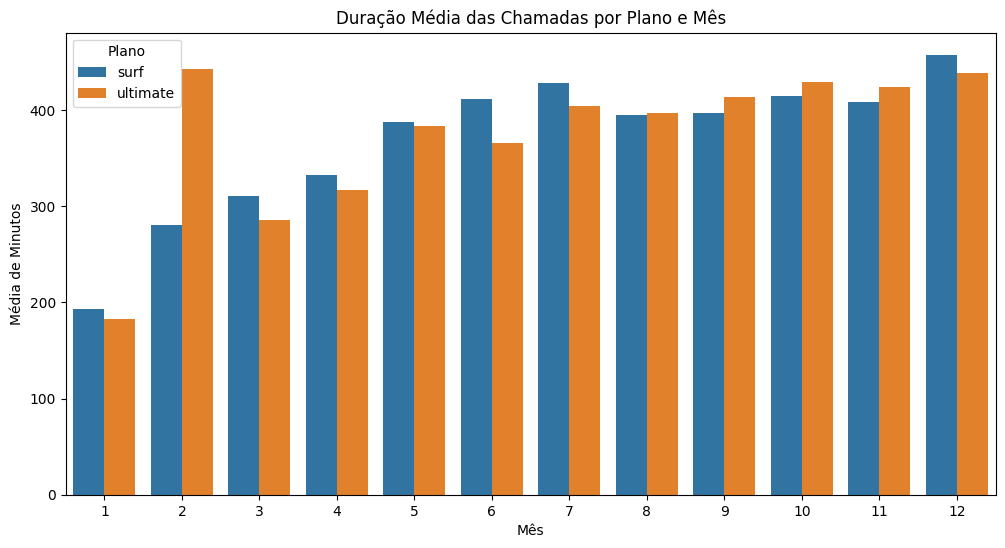

In [129]:
# Comparando a duração média das chamadas de cada plano para cada mês. Criando um gráfico de barras para visualizar o resultado.

# Calculando a duração média das chamadas por plano e por mês
duracao_media = usuarios_por_mes.groupby(['month', 'plan'])['total_minutes_per_month'].mean().reset_index()

# Criando gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=duracao_media, x='month', y='total_minutes_per_month', hue='plan')
plt.title('Duração Média das Chamadas por Plano e Mês')
plt.xlabel('Mês')

plt.ylabel('Média de Minutos')
plt.legend(title='Plano')
plt.show()



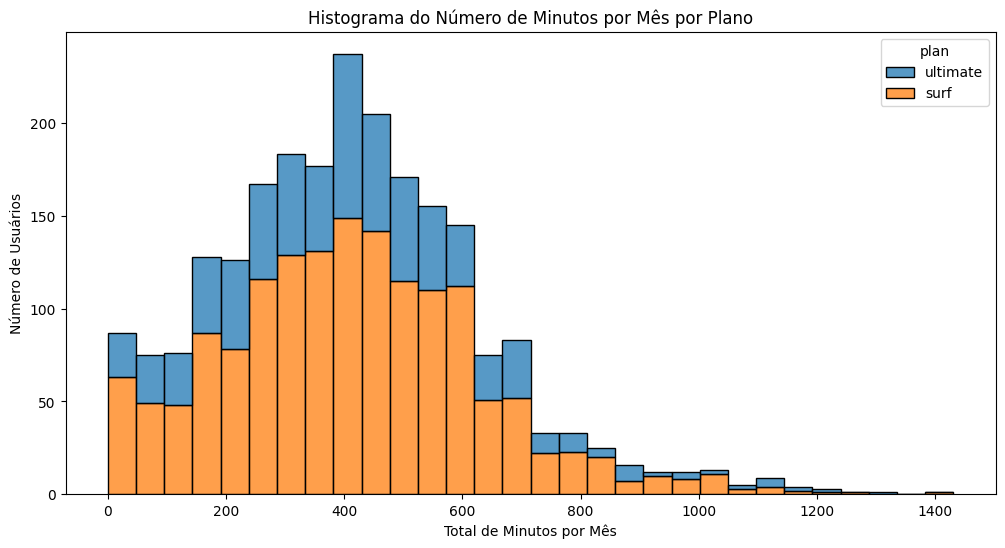

In [130]:
# Comparando o número de minutos que os usuários de cada plano necessitam a cada mês. Construindo um histograma.

# 1.Primeiramente convertendo 'plan' para string 
usuarios_por_mes['plan'] = usuarios_por_mes['plan'].astype(str)

# Configurando o gráfico
plt.figure(figsize=(12,6))
sns.histplot(
    data=usuarios_por_mes,
    x='total_minutes_per_month',
    hue='plan',
    bins=30,
    kde=False,
    multiple='stack'  # empilha para comparar volumes
)

plt.title('Histograma do Número de Minutos por Mês por Plano')
plt.xlabel('Total de Minutos por Mês')
plt.ylabel('Número de Usuários')


plt.show()

Vamos calcular a média e a variância da duração das chamadas para ter dados que nos permita analisar e refelitr se o usuários dos planos da Megaline possuem comportamentos diferentes no que diz respeito as chamadas.

In [131]:
# Calculando a média e a variância da duração mensal das chamadas

# Garantir que 'plan' é string/categoria e 'month' é inteiro
import pandas as pd
import numpy as np

usuarios_por_mes['plan'] = usuarios_por_mes['plan'].astype(str)
usuarios_por_mes['month'] = usuarios_por_mes['month'].astype(int)

# Média e variância (amostral, ddof=1) dos minutos/mês por plano e mês
estat_minutos = (
    usuarios_por_mes
    .groupby(['plan','month'])['total_minutes_per_month']
    .agg(media_minutos='mean', variancia_minutos='var', n='count')
    .reset_index()
)

# Opcional: arredondar os números para análise
estat_minutos['media_minutos'] = estat_minutos['media_minutos'].round(2)
estat_minutos['variancia_minutos'] = estat_minutos['variancia_minutos'].round(2)

estat_minutos.head(10)


,plan,month,media_minutos,variancia_minutos,n
0,surf,1,192.84,14795.44,2
1,surf,2,280.85,46959.22,9
2,surf,3,310.97,31821.32,23
3,surf,4,332.38,45615.67,50
4,surf,5,387.11,50778.13,75
5,surf,6,411.45,39424.05,96
6,surf,7,428.06,53364.54,120
7,surf,8,394.47,46639.24,159
8,surf,9,397.13,39785.30,191
9,surf,10,414.44,44103.68,232


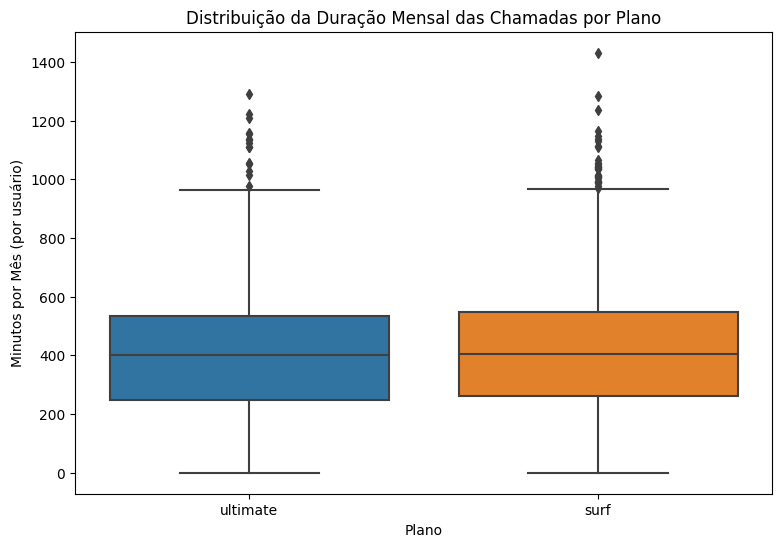

In [132]:
# Fazendo um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9,6))
ax = sns.boxplot(
    data=usuarios_por_mes,
    x='plan',
    y='total_minutes_per_month'
)
ax.set_title('Distribuição da Duração Mensal das Chamadas por Plano')
ax.set_xlabel('Plano')
ax.set_ylabel('Minutos por Mês (por usuário)')
plt.show()


Analisando o diagrama de caixa, observo que os usuários dos planos Surf e Ultimate apresentam um comportamento muito similar em relação à duração mensal das chamadas, podemos comprovar através da mediana que tanto no Ultimate quanto no Surf, a mediana está em torno de 400 minutos/mês, ou seja, os usuários de ambos os planos passam, em média, o mesmo tempo em chamadas. Não há evidência clara de que um grupo use significativamente mais ou menos minutos do que o outro. A distribuição é ampla em ambos, com medianas próximas e presença de outliers em níveis semelhantes. Ambos os planos apresentam outliers para cima (usuários que falam muito acima da média) e também alguns para baixo (quase sem chamadas). Isso reforça que o comportamento extremo não depende do plano. A “caixa” dos dois planos tem tamanho muito parecido, o que mostra que a variabilidade central do uso é semelhante.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho!
    
Todas as visualizações solicitadas para as chamadas estão presentes e acompanhadas da conclusão sobre o comportamento ilustrado!
    
Muito bom!
</div>


### Mensagens

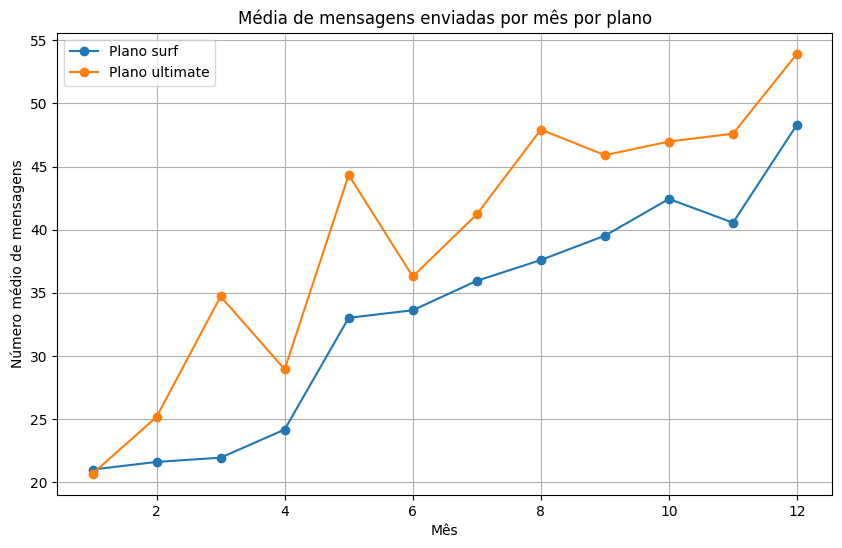

In [133]:
# Comparando o número de mensagens que os usuários de cada plano costumam enviar a cada mês

# 1. Criar uma coluna "month" com o mês das mensagens
mensagens['month'] = mensagens['message_date'].dt.month

# 2. Contar quantas mensagens cada usuário enviou por mês
mensagens_por_mes = (
    mensagens
    .groupby(['user_id', 'month'])
    .agg({'id': 'count'})  # contando a quantidade de mensagens
    .reset_index()
    .rename(columns={'id': 'num_mensagens'})
)

# 3. Juntar essa info com o DataFrame dos usuários para termos o plano de cada um
mensagens_por_mes = mensagens_por_mes.merge(usuarios[['user_id', 'plan']], on='user_id', how='left')

# 4. Calcular a média de mensagens enviadas por mês em cada plano
media_mensagens_plano = (
    mensagens_por_mes
    .groupby(['plan', 'month'])['num_mensagens']
    .mean()
    .reset_index()
)

# 5. Plotar comparação dos planos
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for plano in media_mensagens_plano['plan'].unique():
    dados = media_mensagens_plano[media_mensagens_plano['plan'] == plano]
    plt.plot(dados['month'], dados['num_mensagens'], marker='o', label=f'Plano {plano}')

plt.title("Média de mensagens enviadas por mês por plano")
plt.xlabel("Mês")
plt.ylabel("Número médio de mensagens")
plt.legend()
plt.grid(True)
plt.show()



Traçando uma análise comparativa entre os planos em relação ao uso de mensagens, temos que o Plano Ultimate apresenta quantidade maior de mensagens enviadas em praticamente todos os meses. A média mensal gira entre 30 e 55 mensagens, mostrando que os usuários desse plano enviam mais SMS ao longo do tempo. A variação é um pouco mais acentuada, indicando que alguns meses há picos mais altos de envio. Já no Plano Surf, os usuários enviam menos mensagens, com médias entre 25 e 48 mensagens por mês. O crescimento ao longo dos meses é mais estável e linear, ainda que cresça, nunca alcança os mesmos patamares do plano Ultimate. A diferença entre os dois planos se amplia em meses de maior uso, sugerindo que os clientes do Ultimate têm maior necessidade de comunicação por SMS, isso pode estar ligado ao perfil do usuário clientes do Ultimate tendem a consumir mais serviços de comunicação no geral (chamadas, internet e SMS).

### Internet

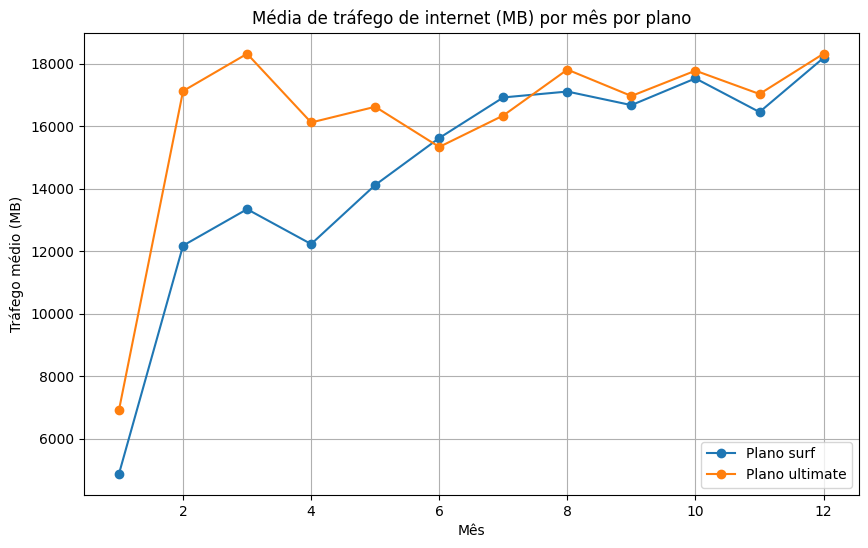

In [134]:
# Comparando a quantidade de tráfego de internet consumido pelos usuários por plano

# 1. Criando coluna de mês no dataframe de internet
internet['month'] = internet['session_date'].dt.month

# 2. Somando o tráfego por usuário e mês
trafego_por_mes = (
    internet
    .groupby(['user_id', 'month'])
    .agg({'mb_used': 'sum'})   # tráfego total em MB
    .reset_index()
    .rename(columns={'mb_used': 'total_mb'})
)

# 3. Juntando com a tabela de usuários para identificar o plano
trafego_por_mes = trafego_por_mes.merge(usuarios[['user_id', 'plan']], on='user_id', how='left')

# 4. Calculando a média de tráfego por plano e mês
media_trafego_plano = (
    trafego_por_mes
    .groupby(['plan', 'month'])['total_mb']
    .mean()
    .reset_index()
)

# 5. Plotar os resultados (criando o gráfico)

plt.figure(figsize=(10,6))
for plano in media_trafego_plano['plan'].unique():
    dados = media_trafego_plano[media_trafego_plano['plan'] == plano]
    plt.plot(dados['month'], dados['total_mb'], marker='o', label=f'Plano {plano}')

plt.title("Média de tráfego de internet (MB) por mês por plano")
plt.xlabel("Mês")
plt.ylabel("Tráfego médio (MB)")
plt.legend()
plt.grid(True)
plt.show()

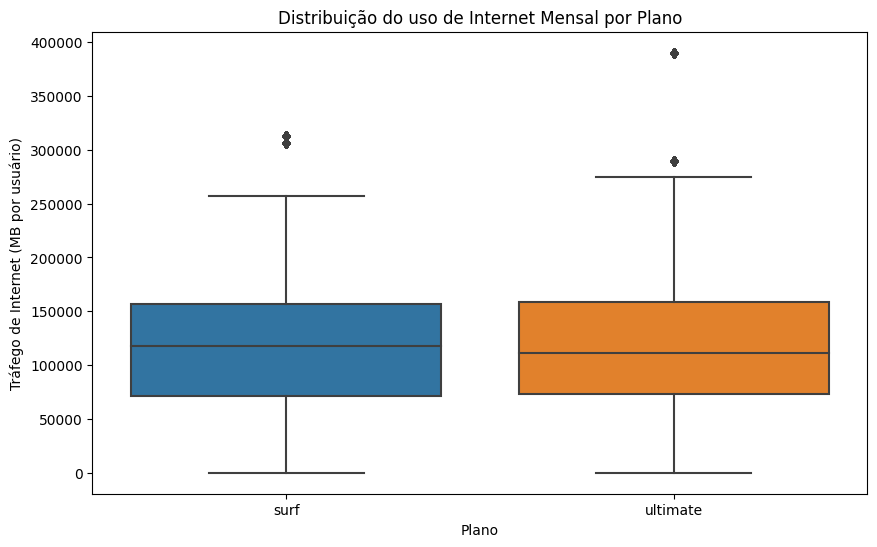

In [135]:
# Criando um boxplot da distribuição de tráfego de internet por plano.
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mesclando o dataframe de internet com o de usuários para puxar o plano de cada um
internet_com_planos = internet.merge(usuarios[['user_id', 'plan']], on='user_id', how='left')

# 2. Boxplot da distribuição do tráfego de internet mensal por plano
plt.figure(figsize=(10,6))
sns.boxplot(x='plan', y='total_mb_per_user', data=internet_com_planos)

plt.title('Distribuição do uso de Internet Mensal por Plano')
plt.xlabel('Plano')
plt.ylabel('Tráfego de Internet (MB por usuário)')
plt.show()


Com os dois gráficos, tanto a média consolidada e a distribuição do uso de internet mensal por plano, já temos dados claros para uma análise sólida. A análise do consumo de tráfego de internet evidencia diferenças significativas entre os planos Surf e Ultimate. Em praticamente todos os meses, os clientes do plano Ultimate apresentaram um consumo médio mais elevado de megabytes, indicando que aproveitam melhor os benefícios de um pacote mais robusto e possivelmente ilimitado em algumas dimensões. Esse comportamento sugere que esses usuários se sentem mais confortáveis em utilizar serviços intensivos em dados, como streaming, redes sociais e videoconferências, sem grandes preocupações com custos adicionais. Já os clientes do plano Surf também apresentam crescimento no consumo ao longo do tempo, mas de forma mais moderada. Isso pode refletir uma limitação imposta pela franquia do plano ou uma postura mais cautelosa para evitar cobranças extras.Formule conclusões sobre como os usuários tendem a consumir o tráfego da internet. O comportamento é diferente dependendo do plano?

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Mensagens e internet tiveram o seu comportamento investigado conforme solicitado na lição, com gráficos e conclusão apresentados.
</div>




## Receita

Da mesma forma que o projeto vimos a análise de dados referente ao comportamento dos usuários, vamos analisar também, estatisticamente, as receitas dos planos Surf e Ultimate e verificar qual franquia é mais rentável para a Megaline.

In [136]:
import pandas as pd
import numpy as np

# Realizando a estatística descritiva por planos
# Base para a análise
base_receita = (
    usuarios_por_mes[['plan', 'receita_mensal']]
    .dropna(subset=['receita_mensal'])


    .copy()
)



# Estatísticas por plano (variância amostral, ddof=1)
stats_receita = (
    base_receita
    .groupby('plan')['receita_mensal']
    .agg(media='mean', variancia='var', desvio_padrao='std', mediana='median', n='count')
    .round(2)
    .reset_index()
)

stats_receita.info


<bound method DataFrame.info of        plan  media  variancia  desvio_padrao  mediana     n
0      surf  57.29    2887.54          53.74    36.68  1573
1  ultimate  72.12     115.97          10.77    70.00   720>

In [137]:
stats_receita.head()

,plan,media,variancia,desvio_padrao,mediana,n
0,surf,57.29,2887.54,53.74,36.68,1573
1,ultimate,72.12,115.97,10.77,70.00,720


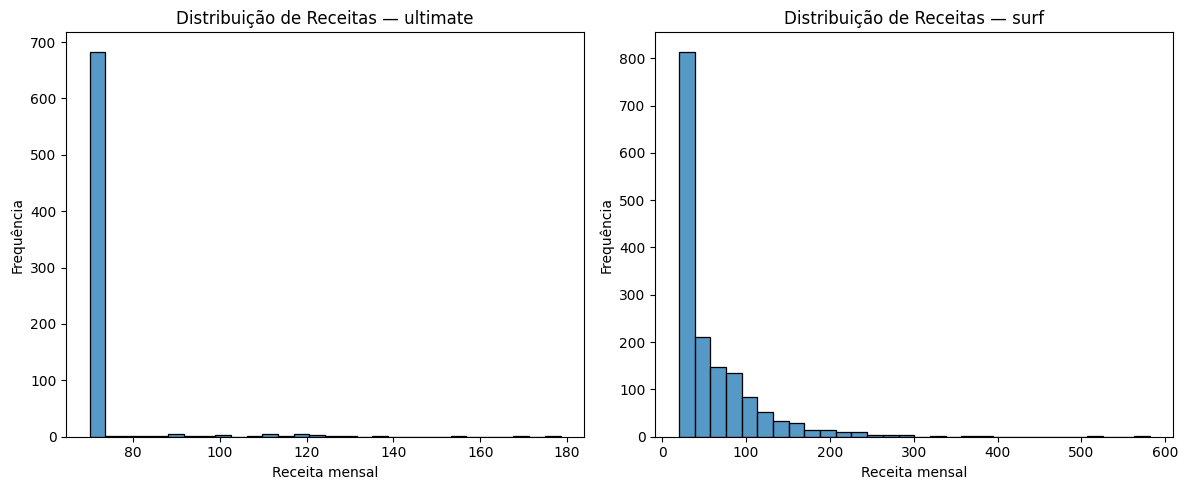

In [138]:


# Visaulização dos histrogramas das receitas por planos

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

planos = base_receita['plan'].unique()
for i, p in enumerate(planos, start=1):
    plt.subplot(1, len(planos), i)
    sns.histplot(
        data=base_receita[base_receita['plan'] == p],
        x='receita_mensal',
        bins=30,
        kde=False
    )
    plt.title(f'Distribuição de Receitas — {p}')
    plt.xlabel('Receita mensal')
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()




Analisando os histogramas acima sobre as distribuições das receitas, minhas conclusões sobre a receita mensal é que ela difere entre os planos. O plano Surf visivelmente traz mais lucro para Megaline, ainda que ambos os planos inicialmente tem lucro similar, o plano Ultimate perde a força, proavelmente pelo perfil do usuário que deve usar sem moderação todos os serviços inclusos na franquia. A receita mensal do Plano Ultimate é altamente concentrada em torno do valor da assinatura fixa (pico bem definido no histograma), indicando que a maioria dos usuários não ultrapassa a franquia inclusa (minutos, mensagens e dados), isso gera para a Megaline uma receita estável, mas limitada, já que dificilmente cresce além da mensalidade. No Plano Surf a distribuição do lucro é assimétrica à direita, com muitos clientes pagando apenas o valor base, mas também com vários casos de receita significativamente maior. Isso acontece porque usuários que consomem acima da franquia geram receitas adicionais, contratando serviços extras que não estão inclusos na franquia do plano. Dessa forma, a conclusão comparativa da receita mensal é que embora o plano Ultimate gere receitas estáveis por conta da assinatura fixa, ele limita o crescimento de faturamento da Megaline, já que a maioria dos usuários não ultrapassa os pacotes inclusos. Já o plano Surf, apesar de ter uma mensalidade mais baixa, mostra maior variabilidade e permite capturar receitas adicionais quando os clientes excedem a franquia. Assim, no agregado, o Surf tende a gerar mais lucro para a Megaline.

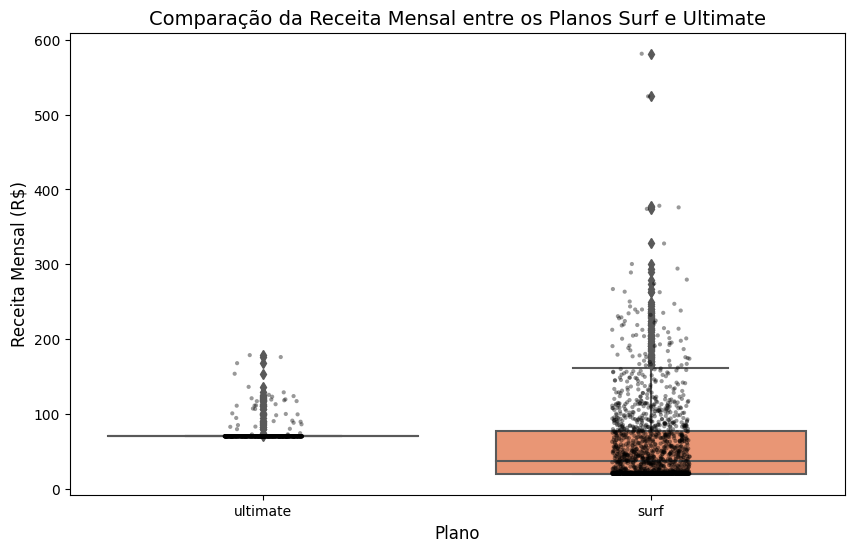

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um gráfico de comparação da Receita Mensal entre os planos Surf e Ultimate

# Como minha base de dados se chama "base_receita" vou garantir que é esse o nome usado para df
df = base_receita  

# Criando um boxplot mostrando a distribuição, mediana e variação da receita mensal por plano.
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='plan', y='receita_mensal', palette='Set2')
sns.stripplot(data=df, x='plan', y='receita_mensal', 
              color='black', size=3, jitter=True, alpha=0.4)

plt.title("Comparação da Receita Mensal entre os Planos Surf e Ultimate", fontsize=14)
plt.xlabel("Plano", fontsize=12)
plt.ylabel("Receita Mensal (R$)", fontsize=12)
plt.show()


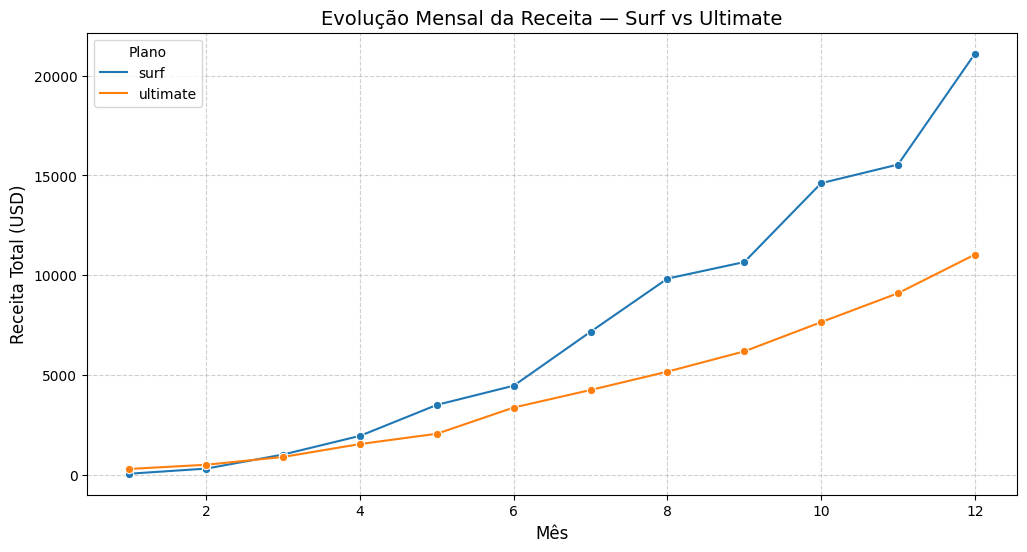

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um gráfico para visualizar a evolução da receita mensal entre os planos Surf e Ultimate

# 1. Agrupando a receita mensal total por plano e mês
receita_mensal_agrupada = usuarios_por_mes.groupby(['month', 'plan'])['receita_mensal'].sum().reset_index()

# 2. Plotando a evolução temporal
plt.figure(figsize=(12,6))
sns.lineplot(
    data=receita_mensal_agrupada, 
    x='month', 
    y='receita_mensal', 
    hue='plan', 
    marker="o"
)

plt.title("Evolução Mensal da Receita — Surf vs Ultimate", fontsize=14)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Receita Total (USD)", fontsize=12)
plt.legend(title="Plano")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

O gráfico gerado acima é justamente o ponto-chave para transformar a análise em um estudo estratégico de negócio para os gestores da Megaline, capaz de estruturar a análise de forma detalhada, clara e aplicada, trazendo a visão econômica e financeira que precisamos para decidir onde investir mais e como maximizar o lucro. Ao comparar a receita mensal dos planos Surf e Ultimate, percebemos que cada um tem um papel importante no negócio da Megaline. O plano Ultimate gera mais dinheiro por cliente, já que é mais caro, mas precisa de maior cuidado para manter os usuários satisfeitos e evitar cancelamentos (churn). Já o plano Surf atrai muito mais gente, o que compensa a receita menor de cada assinatura e garante uma base ampla de clientes ativos. Isso mostra que a Megaline deve trabalhar em duas frentes: valorizar quem já paga mais no Ultimate, oferecendo vantagens e fidelização, e ao mesmo tempo usar o Surf como porta de entrada para conquistar novos clientes, que no futuro podem migrar para planos de maior valor. Dessa forma, a Megaline consegue crescer de forma equilibrada, unindo volume e rentabilidade.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Bruno, na investigação da receita seria bem importante incluir a visão mensal que compara os planos, tal qual fez com as dimensões anteriores.
</div>




<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Oi Rafael, obrigado pelo feedback. Sem duvida a inclusão dos graficos possibilita uma visão mais ampla e objetiva para uma análise completa. Afinal, é através da Receita que os resultados poderão trazer as respostas que precisamos, e serão mais relevantes para uma conclusão mais coerente e precisa quanto ao valor do negócio.



<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Obrigado pelo ajuste!
</div>




## Teste hipóteses estatísticas

Primeiramente vamos testar a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes. Este é um teste bicaudal, onde a Hipótese Nula (H₀) significa que a receita média dos planos Surf e Ultimate é igual; e a Hipótese Alternativa (H₁) significa que a receita média dos planos Surf e Ultimate é diferente. Como estamos comparando duas médias independentes usamos o teste para amostras independentes com teste t de Student. Mas como as variâncias podem ser diferentes, vamos usar a versão Welch’s t-test (ttest_ind(..., equal_var=False)). Para o nível de significância da hipótese estatística aceitaremos até 5% de probabilidade de erro (rejeitar H₀ quando ela é verdadeira), aplicando o valor de alfa em 0,05.

In [141]:
from scipy import stats

# Definindo as hipóteses
# H0: a receita média do plano Surf = receita média do plano Ultimate
# H1: a receita média do plano Surf ≠ receita média do plano Ultimate

# Filtrando receitas por plano
surf_revenue = base_receita.query("plan == 'surf'")["receita_mensal"]
ultimate_revenue = base_receita.query("plan == 'ultimate'")["receita_mensal"]

# Realizando o teste t de duas amostras independentes
t_stat, p_value = stats.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)  # Welch’s t-test

# Definindo nível de significância (alpha)
alpha = 0.05

print("Estatística t:", t_stat)
print("p-valor:", p_value)

if p_value < alpha:
    print("Rejeitamos H0: as receitas médias são diferentes.")
else:
    print("Não rejeitamos H0: não há evidência de diferença significativa entre as receitas médias.")


Estatística t: -10.489446388254443
p-valor: 4.881852673479799e-25
Rejeitamos H0: as receitas médias são diferentes.


Agora vamos testar a hipótese de que a receita média dos usuários de uma área específica (NY-NJ), ou seja, New York-New Jersey, difere dos usuários das demais regiões. Como o DataFrame 'usuarios' não possuía a coluna 'region', foi necessário realizar uma mesclagem entre os dados de usuários e o DataFrame de receitas (receita_mensal), que já incluía a informação de região. Assim, conseguimos associar cada usuário à sua respectiva área geográfica e, a partir disso, separar os grupos de interesse: usuários da região NY-NJ e usuários das demais regiões. 

Como usuarios não tem 'region', derivei um indicador de NY-NJ a partir da coluna 'city' para então rodar o teste t (Welch). Abaixo vai toda codificação pronta para testar nossa hipótese, usando apenas os DataFrames que já temos: 'usuarios_por_mes' (com user_id, plan, receita_mensal) e 'usuarios' (com user_id, city). As hipóteses estatísticas serão a Hipótese Nula (H₀) que é a hipótese "padrão", que assume que não existe diferença ou efeito. No nosso caso H₀ significa que a receita média dos usuários de NY-NJ é igual à receita média dos usuários das demais regiões. Já Hipótese Alternativa (H₁) é a hipótese contrária, que propõe que existe uma diferença entre os grupos. No nosso caso H₁ significa que a receita média dos usuários de NY-NJ é diferente da receita média dos usuários das demais regiões. Adotamos como nível de significância para essa hipótese em 5%, atribuindo o valor de alfα igual a 0,05, ou seja, aceitamos uma probabilidade de 5% de rejeitar a hipótese nula mesmo que ela seja verdadeira.

In [142]:
import pandas as pd
from scipy import stats
import numpy as np

# Testando a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões:

# 1) Base de receita com user_id (garante que temos user_id para o merge)
base_receita = (
    usuarios_por_mes[['user_id', 'plan', 'receita_mensal']]
    .dropna(subset=['receita_mensal'])
    .copy()
)

# 2) Trazendo a cidade do usuário 
base_receita = base_receita.merge(usuarios[['user_id', 'city']], on='user_id', how='left')

# 3) Derivar indicador de NY-NJ a partir do texto da cidade
# Ex.: "New York-Newark-Jersey City, NY-NJ-PA MSA" contém "NY-NJ"
base_receita['is_ny_nj'] = base_receita['city'].str.contains('NY-NJ', case=False, na=False)

# 4) Separar as amostras
ny_nj = base_receita.loc[base_receita['is_ny_nj'], 'receita_mensal']
outras = base_receita.loc[~base_receita['is_ny_nj'], 'receita_mensal']

# 5) Teste t de Welch
t_stat, p_value = stats.ttest_ind(ny_nj, outras, equal_var=False, nan_policy='omit')

alpha = 0.05
print(f"Estatística t: {t_stat:.4f}")
print(f"p-valor: {p_value:.4e}")

if p_value < alpha:
    print("➡️ Rejeitamos H0: as receitas médias são diferentes entre NY-NJ e demais regiões.")
else:
    print("➡️ Não rejeitamos H0: não há evidência de diferença significativa de receitas médias.")

# 6) (opcional) Resumo comparativo
resumo = pd.DataFrame({
    'grupo': ['NY-NJ', 'Outras'],
    'n': [ny_nj.size, outras.size],
    'media': [ny_nj.mean(), outras.mean()],
    'mediana': [ny_nj.median(), outras.median()],
    'desvio_padrao': [ny_nj.std(ddof=1), outras.std(ddof=1)]
}).round(2)

print("\nResumo por grupo:")
print(resumo.to_string(index=False))



Estatística t: -2.3601
p-valor: 1.8609e-02
➡️ Rejeitamos H0: as receitas médias são diferentes entre NY-NJ e demais regiões.

Resumo por grupo:
 grupo    n  media  mediana  desvio_padrao
 NY-NJ  377  57.19    48.62          42.16
Outras 1916  62.88    70.00          46.00



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>




<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Fico extremamente feliz em perceber que além dos códigos o que mais importa nos projetos é a visão analítica para se obter um projeto mais robusto e eficiente. São nas conclusões e análises que consigo destacar um trabalho que realmente faz sentido e agrega valor ao negócio.

## Conclusão geral

Durante a análise, conduzi dois testes de hipótese voltados para avaliar diferenças significativas na receita média dos usuários. Apresento minhas conclusões de forma analítica e comparativa. Na primeira hipótese sobre a comparação geral dod planos Surf e Ultimate (Estatística t = -10,49, p-valor ≈ 4,88e-25) o resultado foi altamente significativo (p ≪ 0,05), indicando que a diferença de receita média entre os grupos analisados não pode ser atribuída ao acaso. Nesse sentido, há forte evidência estatística de que as receitas médias diferem substancialmente entre os grupos. Esse resultado sugere que o tipo de plano ou condição financeira do usuário exerce impacto direto sobre a receita. Já na segunda hipótese sobre a comparação entre região NY-NJ e demais regiões (Estatística t = -2,36, p-valor ≈ 0,0186) também rejeitamos H₀ ao nível de 5%, porém o efeito foi mais moderado em relação ao primeiro teste.
Embora a diferença seja estatisticamente significativa, a magnitude prática da diferença entre as médias (NY-NJ ≈ 57,19 X outras regiões ≈ 62,88) é menos expressiva do que a encontrada na primeira hipótese. A conclusão é de que ambos os testes mostraram que a receita média não é homogênea entre grupos de usuários, reforçando a importância de segmentações mais granulares. A diferença detectada no primeiro teste foi robusta, quase incontestável do ponto de vista estatístico, enquanto a diferença regional (NY-NJ x demais regiões) é mais sutil, embora ainda relevante. Esse contraste mostra que, ao analisar dados de receita, não apenas a localização geográfica, mas também outros fatores (como planos ou perfil de uso) parecem ser determinantes e mais fortes.

Minhas recomendações finais é que o Plano Ultimate deve ser o foco central dos investimentos, tanto em aquisição quanto em retenção, já que gera maior receita média e representa maior potencial de lucratividade. Já o Plano Surf pode continuar sendo oferecido como produto de entrada, mas precisa ser complementado com estratégias de conversão para Ultimate para aumentar o ticket médio ao longo do ciclo de vida do cliente. Sobre a hipótese levantada comparanado a região NY-NJ com as demais regiões, o estudo merece atenção especial, pois a receita média da região NY-NJ está abaixo da média nacional, nesse caso a recomendação seria testar campanhas de fidelização e incentivos para migração ao Plano Ultimate na localidade. Já nas demais regiões, elas apresentam receita média mais elevada, o que reforça a necessidade de consolidar a base atual e expandir a presença do Plano Ultimate.


Assim, concluo a análise desse projeto da Megaline baseada em Dados, informando que o Plano Ultimate é o plano mais rentável e deve receber prioridade estratégica da empresa, e o Plano Surf pode ser reposicionado como canal de aquisição, mas precisa estar integrado a estratégias de migração. Sobre a região New York-New Jersey (NY-NJ) exige ações específicas para elevar a receita média e reduzir a distância em relação às demais regiões.

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Com todos os códigos e gráficos montados, me pemiti aqui em realizar considerações e conclusões finais baseadas os números alcançados. 